In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pprint import pprint

from bs4 import BeautifulSoup
import re

from nltk.tokenize import WordPunctTokenizer


In [2]:
cols=["sentiment","id","date","query","user","text"]
df = pd.read_csv("training.1600000.processed.noemoticon.csv",encoding="ISO-8859-1",header=None, names=cols)

In [3]:
#dropping columns that we don't need for our purpose
df.drop(["id","date","query","user"],axis=1,inplace=True)

In [4]:
#calculating the length of each tweet in text column
df["pre_clean_len"] = [len(t) for t in df.text]

In [5]:
#Data dictionnary

data_dict={
    "sentiment":{
        'type': df.sentiment.dtype,
        'description': "sentiment class : 0:negative , 1:positive "
    },
    "text":
    {
        'type': df.text.dtype,
        'description': "tweets"
    },
    "pre_clean_len":
    {
        'type': df.pre_clean_len.dtype,
        'description': "tweets length before cleaning"
    },
    'dataset_shape':df.shape
    
}

pprint(data_dict)

{'dataset_shape': (1600000, 3),
 'pre_clean_len': {'description': 'tweets length before cleaning',
                   'type': dtype('int64')},
 'sentiment': {'description': 'sentiment class : 0:negative , 1:positive ',
               'type': dtype('int64')},
 'text': {'description': 'tweets', 'type': dtype('O')}}


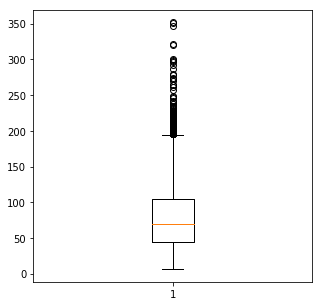

In [6]:
#boxplot visualization of tweets string length
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.pre_clean_len)
plt.show()

In [11]:
tok = WordPunctTokenizer()
#regex for @mention detection
mention_regex = r'@[A-Za-z0-9]+'
#regex for links detection
http_regex = r'https?://[^ ]+'
www_regex = r'www.[^ ]+'
bom_removing = "ï¿½"
combined_regex = r'|'.join((mention_regex, http_regex))
#negation dictionnary
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

In [12]:
#main function for cleaning the tweets
def tweet_cleaner(text):
    soup = BeautifulSoup(text,"lxml")
    souped = soup.get_text()
    stripped = re.sub(combined_regex, '', souped)
    
    try:
        bom_removed = souped.replace(bom_removing, "?")
    except:
        bom_removed = souped
        
    stripped = re.sub(combined_regex, '', bom_removed)
    stripped = re.sub(www_regex, '', stripped)
    
    lower_case = stripped.lower()
    
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    
    return (" ".join(words)).strip()
        

In [14]:
nums = [0,400000,800000,1200000,1600000]
print ("Cleaning and parsing the tweets...\n")
clean_tweet_texts = []
#i cleaned the wole dataset
for i in range(nums[0],nums[4]):
    if( (i+1)%10000 == 0 ):
        print ("Tweets %d of %d has been processed" % ( i+1, nums[4] ) )                                                                   
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))

Cleaning and parsing the tweets...

Tweets 10000 of 1600000 has been processed
Tweets 20000 of 1600000 has been processed
Tweets 30000 of 1600000 has been processed
Tweets 40000 of 1600000 has been processed
Tweets 50000 of 1600000 has been processed
Tweets 60000 of 1600000 has been processed
Tweets 70000 of 1600000 has been processed
Tweets 80000 of 1600000 has been processed
Tweets 90000 of 1600000 has been processed
Tweets 100000 of 1600000 has been processed
Tweets 110000 of 1600000 has been processed
Tweets 120000 of 1600000 has been processed
Tweets 130000 of 1600000 has been processed
Tweets 140000 of 1600000 has been processed
Tweets 150000 of 1600000 has been processed
Tweets 160000 of 1600000 has been processed
Tweets 170000 of 1600000 has been processed
Tweets 180000 of 1600000 has been processed
Tweets 190000 of 1600000 has been processed
Tweets 200000 of 1600000 has been processed
Tweets 210000 of 1600000 has been processed
Tweets 220000 of 1600000 has been processed
Tweet

In [15]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['target'] = df.sentiment
clean_df.head()

,text,target
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it not behaving at all mad why am here beca...,0


In [20]:
my_df.dropna(inplace=True)
my_df.reset_index(drop=True,inplace=True)
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596522 entries, 0 to 1596521
Data columns (total 2 columns):
text      1596522 non-null object
target    1596522 non-null int64
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [19]:
clean_df.to_csv('clean_tweet.csv',encoding='utf-8')
csv = 'clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

,text,target
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it not behaving at all mad why am here beca...,0
